In [3]:
import numpy as np
import tensorflow as tf
tf.debugging.set_log_device_placement(True) 

In [25]:
def decode(tensor):
    """
    Converts the 12 uint64s into a 768 float32 tensor.
    """
    masks = tf.convert_to_tensor(2 ** np.arange(64, dtype=np.int64))
    masked = tf.bitwise.bitwise_and(tf.expand_dims(tensor, -1), masks)
    return tf.cast(tf.not_equal(masked, 0), dtype=tf.float32)

# read file
dataset = tf.data.Dataset.list_files('../data/dataset/*.bin')
dataset = tf.data.FixedLengthRecordDataset(dataset, record_bytes=3 * 12 * 8)
dataset = dataset.map(lambda s: tf.reshape(tf.io.decode_raw(s, tf.int64), (3, 12)))
# dataset = dataset.take(2)
dataset = dataset.batch(32)
dataset = dataset.map(decode)

for i in dataset.take(1):
    print(i)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatchingFiles in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Greater in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReduceJoin in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0

In [12]:
batch = next(iter(dataset.take(1)))
batch.shape

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


TensorShape([1, 3, 12, 64])

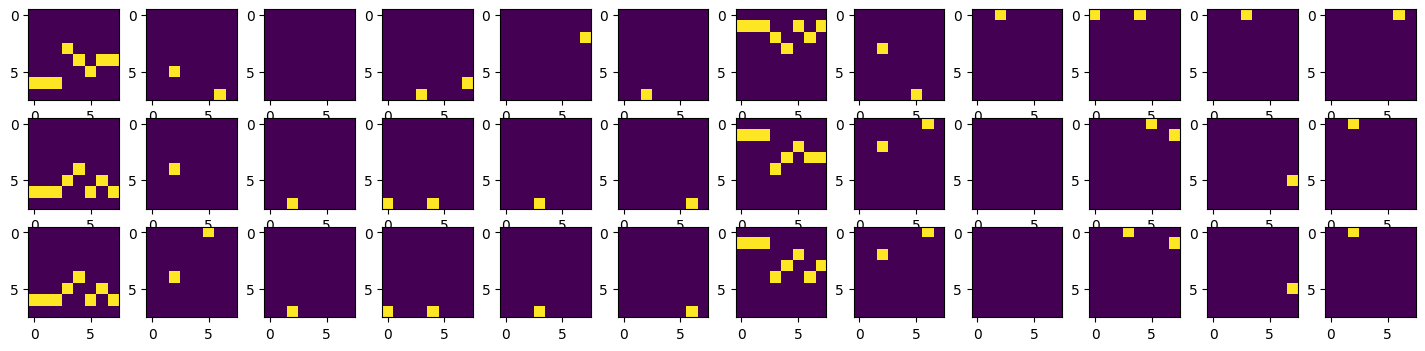

In [10]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 12, figsize=(18, 4))
for kind in range(3):
    for layer in range(12):
        axs[kind][layer].imshow(batch.numpy()[0][kind][layer].reshape((8,8)))
plt.show()